In [554]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


In [555]:
titanic = sns.load_dataset('./titanic')

In [556]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [557]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [558]:
titanic.drop_duplicates(inplace=True)

In [559]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135204
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002551
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.742347
embark_town    0.002551
alive          0.000000
alone          0.000000
dtype: float64

In [560]:
titanic.dropna(subset=["embarked","embark_town"],inplace=True)

In [561]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135550
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.744246
embark_town    0.000000
alive          0.000000
alone          0.000000
dtype: float64

In [562]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          676 non-null    float64
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   embarked     782 non-null    object 
 8   class        782 non-null    object 
 9   who          782 non-null    object 
 10  adult_male   782 non-null    bool   
 11  deck         200 non-null    object 
 12  embark_town  782 non-null    object 
 13  alive        782 non-null    object 
 14  alone        782 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 87.1+ KB


In [563]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
338,1,3,male,45.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,yes,True
261,1,3,male,3.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
572,1,1,male,36.00,0,0,26.3875,S,First,man,True,E,Southampton,yes,True
102,0,1,male,21.00,0,1,77.2875,S,First,man,True,D,Southampton,no,False
110,0,1,male,47.00,0,0,52.0000,S,First,man,True,C,Southampton,no,True
166,1,1,female,NaN,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False
761,0,3,male,41.00,0,0,7.1250,S,Third,man,True,NaN,Southampton,no,True
156,1,3,female,16.00,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True
124,0,1,male,54.00,0,1,77.2875,S,First,man,True,D,Southampton,no,False


In [564]:
titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [565]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [566]:
titanic.drop(columns=['alive','who'],inplace=True)

In [567]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
703,0,3,male,25.0,0,0,7.7417,Q,Third,True,NaN,Queenstown,True
170,0,1,male,61.0,0,0,33.5000,S,First,True,B,Southampton,True
175,0,3,male,18.0,1,1,7.8542,S,Third,True,NaN,Southampton,False
395,0,3,male,22.0,0,0,7.7958,S,Third,True,NaN,Southampton,True
427,1,2,female,19.0,0,0,26.0000,S,Second,False,NaN,Southampton,True


In [568]:
titanic["deck"].value_counts(),titanic["embark_town"].value_counts(),titanic["sex"].value_counts(),titanic["adult_male"].value_counts()

(deck
 C    59
 B    44
 D    33
 E    32
 A    15
 F    13
 G     4
 Name: count, dtype: int64,
 embark_town
 Southampton    568
 Cherbourg      155
 Queenstown      59
 Name: count, dtype: int64,
 sex
 male      491
 female    291
 Name: count, dtype: int64,
 adult_male
 True     451
 False    331
 Name: count, dtype: int64)

##### So, in adult_male column, false value, there is female counts too !  

In [569]:
titanic["age"] = titanic["age"].fillna(0)

##### just checking to plot the bar graph between gender and age ! so that i can have a clear view on how age is divided with gender.

In [570]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
adult_male       0
deck           582
embark_town      0
alone            0
dtype: int64

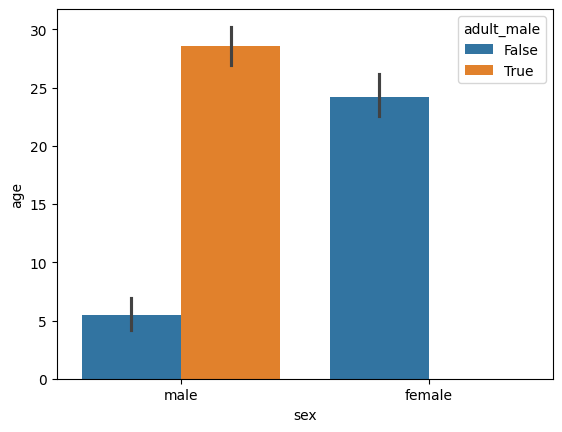

In [571]:
sns.barplot(data=titanic,y="age",x="sex",hue="adult_male")
plt.show()

##### Okay , so we will add a custom logic, 
<p>If, adult_male = True, then we will take the age column with value greater than 18 and fill only those column where adult_male = True with mean ! </p></br>
<p>If, adult_male = False and Sex=Female then we will take the age column corresponding to female sex column and generate the mean and if adult_male = False and sex=Male then we will take the age column corresponding to male sex column and generate the mean of it ! </p>
<p>Right now, we have replaced null value with 0, so we need to create a function to replace 0 with a valid age </p>

In [572]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          782 non-null    float64
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   embarked     782 non-null    object 
 8   class        782 non-null    object 
 9   adult_male   782 non-null    bool   
 10  deck         200 non-null    object 
 11  embark_town  782 non-null    object 
 12  alone        782 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 74.8+ KB


In [573]:
titanic[titanic["adult_male"]==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
5,0,3,male,0.0,0,0,8.4583,Q,Third,True,NaN,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,S,First,True,E,Southampton,True
12,0,3,male,20.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,3,male,20.0,0,0,9.8458,S,Third,True,NaN,Southampton,True
881,0,3,male,33.0,0,0,7.8958,S,Third,True,NaN,Southampton,True
883,0,2,male,28.0,0,0,10.5000,S,Second,True,NaN,Southampton,True
889,1,1,male,26.0,0,0,30.0000,C,First,True,C,Cherbourg,True


In [574]:
adult_male = titanic[(titanic["adult_male"] == True) & (titanic["age"] != 0)]

In [575]:

adult_male[((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))].shape

(16, 13)

##### Here, above this shows the faulty values in our data , age is less than 18 yet he is considered an adult ! so lets remove this data from our adult_male dataFrame 

In [576]:
adult_male[((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
86,0,3,male,16.0,1,3,34.3750,S,Third,True,NaN,Southampton,False
138,0,3,male,16.0,0,0,9.2167,S,Third,True,NaN,Southampton,True
163,0,3,male,17.0,0,0,8.6625,S,Third,True,NaN,Southampton,True
220,1,3,male,16.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
266,0,3,male,16.0,4,1,39.6875,S,Third,True,NaN,Southampton,False
282,0,3,male,16.0,0,0,9.5000,S,Third,True,NaN,Southampton,True
333,0,3,male,16.0,2,0,18.0000,S,Third,True,NaN,Southampton,False
433,0,3,male,17.0,0,0,7.1250,S,Third,True,NaN,Southampton,True
532,0,3,male,17.0,1,1,7.2292,C,Third,True,NaN,Cherbourg,False
550,1,1,male,17.0,0,2,110.8833,C,First,True,C,Cherbourg,False


##### okay okay , confused, lets check if in our data, adult male is considered above 18 or 16 ! 

In [577]:
titanic.shape

(782, 13)

In [578]:
print(titanic[(titanic["age"] < 18) & (titanic["adult_male"] == False) & (titanic["age"] != 0)].shape)
print(adult_male[(adult_male["age"] < 18) & (adult_male["adult_male"] == True) & (adult_male["age"] != 0)].shape)


(94, 13)
(16, 13)


In [579]:
adult_male.shape

(382, 13)

##### okay , we compared the entire dataset with the adult ones , and guess that the relation of adult_male being less than 18 is faulty and hence we will remove those column from the Adult_male dataframe 

In [580]:
adult_male_filtered = adult_male[~((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))]

In [581]:
adult_male_filtered[adult_male_filtered["age"]==0].shape

(0, 13)

Now, we have got the filtered adult_male dataset, so let's calculate the age mean and fill the age column in the titanic with the mean value ! 

In [582]:
adult_male_age_mean = adult_male_filtered["age"].mean()

In [583]:
adult_male_age_mean

34.474043715846996

let's fill up the titanic dataset for adult_male, whose age is 0 (as we have added earlier) and age >= 18, also lets remove the age <18 and adult_male == True from the titanic dataset before we fill our pot ! 

In [584]:
titanic = titanic[~((titanic["age"] < 18) & (titanic["adult_male"]==True) & (titanic["age"] !=0))]

In [585]:
titanic.shape

(766, 13)

In [586]:
titanic[(titanic["age"] == 0)  & (titanic["adult_male"] == True)].shape

(69, 13)

Okay now lets apply the logic ! 

In [587]:
titanic.loc[
    (titanic["age"] == 0) & 
    (titanic["adult_male"] == True) & 
    (titanic["sex"] == "male"),
    "age"
] = adult_male_age_mean

NOW, CHECKING ........

In [588]:
titanic[(titanic["age"] == 0)  & (titanic["adult_male"] == True) & (titanic["sex"] == "male")].shape

(0, 13)

In [589]:
titanic['age'].value_counts()

age
34.474044    69
0.000000     37
24.000000    29
18.000000    25
22.000000    24
             ..
36.500000     1
0.920000      1
23.500000     1
55.500000     1
74.000000     1
Name: count, Length: 90, dtype: int64

Okay, so we are done with filling the value for adult male using the mean, now lets follow the same process and do it for adult_male == false , who are not female (remember in this dataset , adult_male == false is taking account for women too ! )

In [590]:
young_male_with_nan = titanic[(titanic["adult_male"] == False) & (titanic["sex"] == "male") & (titanic["age"] == 0)]

In [591]:
young_male_with_nan 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone


##### since there are no adult male with titanic age of nan, we can omit this 

##### LETS MOVE ON TO WOMAn's data manipulation 

In [592]:
adult_female= titanic[(titanic["adult_male"] == False) & (titanic["sex"] == "female") & (titanic["age"] > 18)]

In [593]:
adult_female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,False
8,1,3,female,27.0,0,2,11.1333,S,Third,False,NaN,Southampton,False
11,1,1,female,58.0,0,0,26.5500,S,First,False,C,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,female,56.0,0,1,83.1583,C,First,False,C,Cherbourg,False
880,1,2,female,25.0,0,1,26.0000,S,Second,False,NaN,Southampton,False
882,0,3,female,22.0,0,0,10.5167,S,Third,False,NaN,Southampton,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,False,NaN,Queenstown,False


In [594]:
adult_female["age"].mean()

33.75935828877005

In [595]:
adult_female_filtered= adult_female[adult_female["age"] != 0]

For adult female looks like there is no zeroth age value , so lets move on to find the woman whose age is less than 18 

In [596]:
young_female = titanic[(titanic["adult_male"] == False) & (titanic["age"] < 18 ) & (titanic["sex"] == "female")]

In [597]:
young_female_age_mean = young_female[young_female['age'] != 0]["age"].mean()

In [598]:
young_female_age_mean

9.393518518518519

In [599]:
### since here , there is no null on adult women, you can use this logic to fill up ! 
titanic.loc[
    (titanic["age"] == 0) & 
    (titanic["adult_male"] == False) & 
    (titanic["sex"] == "female"),
    "age"
] = young_female_age_mean

In [600]:
titanic[titanic["age"] == 0.00]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone


here, we can clearly see that we have fill up all the values which contained 0 in null, now lets find the relation among the feature with deck and fill the null columns too 

In [601]:
titanic["age"].mean()

29.525703918509958

In [602]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
adult_male       0
deck           567
embark_town      0
alone            0
dtype: int64

In [603]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,True


In [604]:
titanic[titanic["class"] == "First"][["pclass", "class", "deck"]]["deck"].value_counts()

deck
C    58
B    44
D    29
E    25
A    15
Name: count, dtype: int64

In [605]:
titanic["deck"].value_counts()

deck
C    58
B    44
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [606]:
titanic["pclass"].value_counts(),titanic["class"].value_counts()

(pclass
 3    392
 1    211
 2    163
 Name: count, dtype: int64,
 class
 Third     392
 First     211
 Second    163
 Name: count, dtype: int64)

we will drop the class column since there is already a numerical representation of it in pclass 

In [607]:
titanic.drop(columns="class",inplace=True)

In [608]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,S,True,NaN,Southampton,False
1,1,1,female,38.000000,1,0,71.2833,C,False,C,Cherbourg,False
2,1,3,female,26.000000,0,0,7.9250,S,False,NaN,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,S,False,C,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,S,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,False,NaN,Queenstown,False
887,1,1,female,19.000000,0,0,30.0000,S,False,B,Southampton,True
888,0,3,female,9.393519,1,2,23.4500,S,False,NaN,Southampton,False
889,1,1,male,26.000000,0,0,30.0000,C,True,C,Cherbourg,True


##### lets do few things , calculate the total number of people on the board per row and also use encoding accordingly

In [609]:
titanic["total_person"] = (titanic["sibsp"] + titanic["parch"]) + 1

In [610]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alone,total_person
885,0,3,female,39.000000,0,5,29.125,Q,False,NaN,Queenstown,False,6
887,1,1,female,19.000000,0,0,30.000,S,False,B,Southampton,True,1
888,0,3,female,9.393519,1,2,23.450,S,False,NaN,Southampton,False,4
889,1,1,male,26.000000,0,0,30.000,C,True,C,Cherbourg,True,1
890,0,3,male,32.000000,0,0,7.750,Q,True,NaN,Queenstown,True,1


In [611]:
####### lets split the dataset into  train test  split  
X = titanic.iloc[:,1:]
y = titanic["survived"]

In [612]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,test_size=0.2)

In [613]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((612, 12), (612,), (154, 12), (154,))

In [614]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alone,total_person
484,1,male,25.000000,1,0,91.0792,C,True,B,Cherbourg,False,2
763,1,female,36.000000,1,2,120.0000,S,False,B,Southampton,False,4
390,1,male,36.000000,1,2,120.0000,S,True,B,Southampton,False,4
660,1,male,50.000000,2,0,133.6500,S,True,NaN,Southampton,False,3
375,1,female,9.393519,1,0,82.1708,C,False,NaN,Cherbourg,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...
381,3,female,1.000000,0,2,15.7417,C,False,NaN,Cherbourg,False,3
265,2,male,36.000000,0,0,10.5000,S,True,NaN,Southampton,True,1
386,3,male,1.000000,5,2,46.9000,S,False,NaN,Southampton,False,8
62,1,male,45.000000,1,0,83.4750,S,True,C,Southampton,False,2


In [615]:
######### using column transformation for encoding the data. 
for_one_hot = ["sex","embarked","adult_male","embark_town","alone"]
for_ordinal = ["deck"]
encoder = ColumnTransformer(
    transformers=[
    ('onehot',OneHotEncoder(drop="first"),for_one_hot),
    ("ordinal",OrdinalEncoder(),for_ordinal)
    ],remainder="passthrough"
)
encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)



In [616]:
X_test_encoded

array([[  1.    ,   0.    ,   0.    , ...,   0.    ,  91.0792,   2.    ],
       [  0.    ,   0.    ,   1.    , ...,   2.    , 120.    ,   4.    ],
       [  1.    ,   0.    ,   1.    , ...,   2.    , 120.    ,   4.    ],
       ...,
       [  1.    ,   0.    ,   1.    , ...,   2.    ,  46.9   ,   8.    ],
       [  1.    ,   0.    ,   1.    , ...,   0.    ,  83.475 ,   2.    ],
       [  1.    ,   0.    ,   0.    , ...,   0.    ,  18.7875,   1.    ]])

In [617]:
feature_names = encoder.get_feature_names_out()

In [618]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

In [619]:
X_train_encoded_DF

,onehot__sex_male,onehot__embarked_Q,onehot__embarked_S,onehot__adult_male_True,onehot__embark_town_Queenstown,onehot__embark_town_Southampton,onehot__alone_True,ordinal__deck,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__total_person
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0,35.000000,1.0,0.0,52.0000,2.0
1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,3.0,24.000000,0.0,0.0,7.7958,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,3.0,41.000000,0.0,2.0,20.2125,3.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,27.000000,0.0,2.0,211.5000,3.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,2.0,36.000000,0.0,0.0,13.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,3.0,26.000000,1.0,0.0,14.4542,2.0
608,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,17.000000,0.0,0.0,14.4583,1.0
609,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,3.0,24.000000,0.0,0.0,7.8958,1.0
610,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,3.0,34.474044,0.0,0.0,14.4583,1.0


In [620]:
X_test_encoded_DF

,onehot__sex_male,onehot__embarked_Q,onehot__embarked_S,onehot__adult_male_True,onehot__embark_town_Queenstown,onehot__embark_town_Southampton,onehot__alone_True,ordinal__deck,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__total_person
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,25.000000,1.0,0.0,91.0792,2.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,36.000000,1.0,2.0,120.0000,4.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,36.000000,1.0,2.0,120.0000,4.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,50.000000,2.0,0.0,133.6500,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,9.393519,1.0,0.0,82.1708,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.000000,0.0,2.0,15.7417,3.0
150,1.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,2.0,36.000000,0.0,0.0,10.5000,1.0
151,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,3.0,1.000000,5.0,2.0,46.9000,8.0
152,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,45.000000,1.0,0.0,83.4750,2.0


In [621]:
#### OKAY, so lets combine this two (X_train_encoded_DF and X_test_encoded_DF) and predict the deck using randomForestClassifier 

In [622]:
new_df = pd.concat([X_train_encoded_DF,X_test_encoded_DF],join="outer",ignore_index=True)

In [623]:
new_df.isna().sum()

onehot__sex_male                     0
onehot__embarked_Q                   0
onehot__embarked_S                   0
onehot__adult_male_True              0
onehot__embark_town_Queenstown       0
onehot__embark_town_Southampton      0
onehot__alone_True                   0
ordinal__deck                      567
remainder__pclass                    0
remainder__age                       0
remainder__sibsp                     0
remainder__parch                     0
remainder__fare                      0
remainder__total_person              0
dtype: int64

In [624]:
### now , lets split the data into training and testing dataset ! 
known_deck = new_df[new_df["ordinal__deck"].notna()]
unknown_deck = new_df[new_df["ordinal__deck"].isna()]

In [638]:
known_deck.isna().sum(),known_deck.shape    

(onehot__sex_male                   0
 onehot__embarked_Q                 0
 onehot__embarked_S                 0
 onehot__adult_male_True            0
 onehot__embark_town_Queenstown     0
 onehot__embark_town_Southampton    0
 onehot__alone_True                 0
 ordinal__deck                      0
 remainder__pclass                  0
 remainder__age                     0
 remainder__sibsp                   0
 remainder__parch                   0
 remainder__fare                    0
 remainder__total_person            0
 dtype: int64,
 (199, 14))

In [639]:
known_deck

,onehot__sex_male,onehot__embarked_Q,onehot__embarked_S,onehot__adult_male_True,onehot__embark_town_Queenstown,onehot__embark_town_Southampton,onehot__alone_True,ordinal__deck,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__total_person
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,27.0,0.0,2.0,211.5000,3.0
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,23.0,0.0,1.0,63.3583,2.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,53.0,2.0,0.0,51.4792,3.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,15.0,0.0,1.0,211.3375,2.0
10,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,61.0,0.0,0.0,33.5000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,2.0,36.5,0.0,2.0,26.0000,3.0
742,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,48.0,1.0,0.0,76.7292,2.0
745,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,3.0,27.0,0.0,1.0,12.4750,2.0
759,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,49.0,1.0,0.0,89.1042,2.0


In [643]:
X = known_deck.iloc[:, list(range(0, 7)) + list(range(8, 14))]


In [647]:
y = known_deck["ordinal__deck"]

In [649]:
y

3      2.0
7      3.0
8      2.0
9      1.0
10     1.0
      ... 
741    5.0
742    3.0
745    4.0
759    2.0
764    2.0
Name: ordinal__deck, Length: 199, dtype: float64

In [650]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [658]:
model = RandomForestClassifier(random_state=42,n_estimators=40,max_depth=2)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=40, random_state=42)

In [659]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.42138364779874216, 0.425)